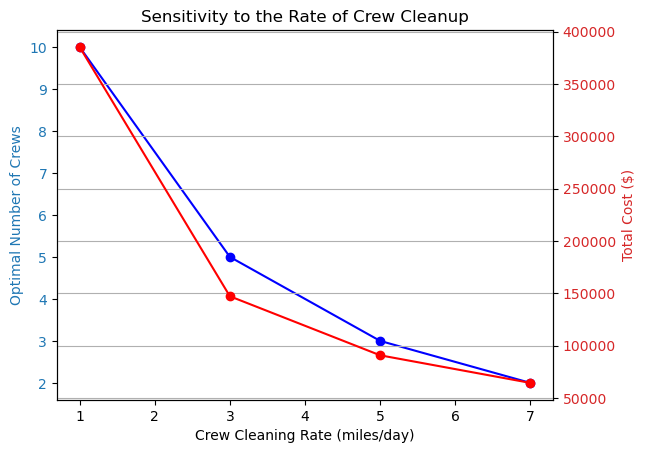

In [2]:
#I. B
import matplotlib.pyplot as plt
import numpy as np

# Define the rates and the corresponding optimal crews and total costs from your analysis
rates = [1, 3, 5, 7]
optimal_crews = [10, 5, 3, 2]  # These are sample results from your previous analysis
total_costs = [385333.33, 147272.73, 90909.09, 64543.69]  # These are the total costs from your previous results

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the optimal number of crews on the left y-axis
ax1.set_xlabel('Crew Cleaning Rate (miles/day)')
ax1.set_ylabel('Optimal Number of Crews', color='tab:blue')
ax1.plot(rates, optimal_crews, 'bo-', label='Optimal Crews')  # Removed color='tab:blue'
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot the total cost
ax2 = ax1.twinx()
ax2.set_ylabel('Total Cost ($)', color='tab:red')
ax2.plot(rates, total_costs, 'ro-', label='Total Cost')  # Removed color='tab:red'
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add a title and grid
plt.title('Sensitivity to the Rate of Crew Cleanup')
plt.grid()

# Show the plot
plt.show()



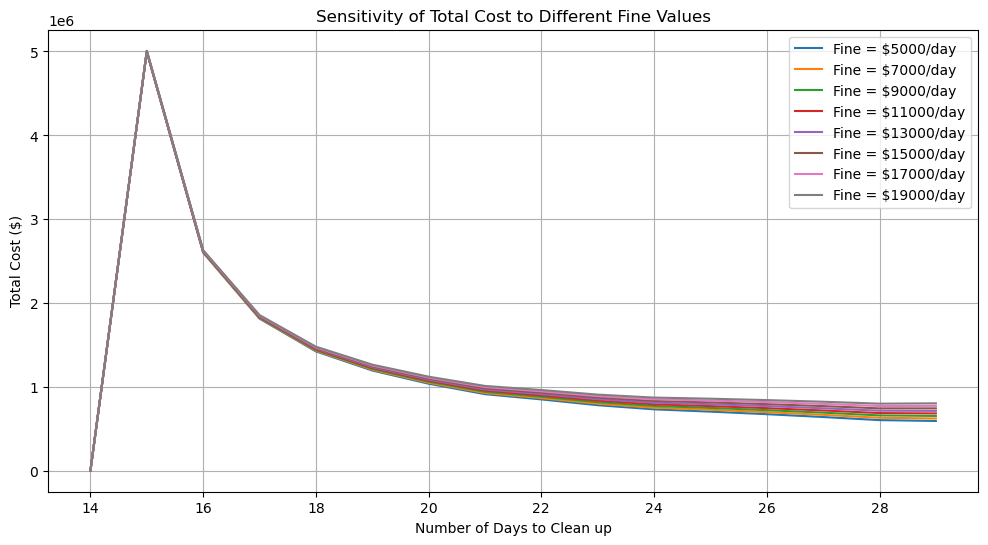

In [3]:
#I. C
import matplotlib.pyplot as plt
import numpy as np

# Define the current parameters
days_limit = 14  # Number of days before fines are applied
initial_cost = 10000  # Initial cost when the cleanup exceeds 14 days
local_cost_per_day = 500  # Local crew cost per day
additional_crew_cost_per_day = 800  # Cost per additional crew per day
additional_crew_setup_cost = 18000  # One-time setup cost for each additional crew
cleanup_rate_local = 5 / 7  # Miles per day for local crew
total_miles = 200  # Total shoreline miles to clean
cleanup_days = np.arange(14, 30)  # Range of possible cleanup days

# Fine values to test
fine_values = np.arange(5000, 20000, 2000)  # Varying the fine from $5000 to $20,000

# Placeholder to store results for plotting
total_costs = []
crews_needed = []

# Perform sensitivity analysis
for fine in fine_values:
    total_cost_per_fine = []
    additional_crews_per_fine = []
    
    for t in cleanup_days:
        miles_cleaned = cleanup_rate_local * t
        remaining_miles = total_miles - miles_cleaned
        
        if remaining_miles > 0 and t > days_limit:
            # Ensure no division by zero; calculate additional crews only when t > days_limit
            additional_crews = np.ceil(remaining_miles / (cleanup_rate_local * (t - days_limit)))
            total_additional_crew_cost = additional_crews * additional_crew_setup_cost + additional_crews * additional_crew_cost_per_day * (t - days_limit)
        else:
            additional_crews = 0
            total_additional_crew_cost = 0
        
        # Calculate the total cost
        if t > days_limit:
            fine_cost = fine * (t - days_limit)
        else:
            fine_cost = 0
        
        local_crew_cost = local_cost_per_day * t
        total_cost = local_crew_cost + total_additional_crew_cost + fine_cost
        total_cost_per_fine.append(total_cost)
        additional_crews_per_fine.append(additional_crews)
    
    total_costs.append(total_cost_per_fine)
    crews_needed.append(additional_crews_per_fine)

# Convert lists to arrays for easier plotting
total_costs = np.array(total_costs)
crews_needed = np.array(crews_needed)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot total cost vs fine
for idx, fine in enumerate(fine_values):
    plt.plot(cleanup_days, total_costs[idx], label=f'Fine = ${fine}/day')

plt.xlabel('Number of Days to Clean up')
plt.ylabel('Total Cost ($)')
plt.title('Sensitivity of Total Cost to Different Fine Values')
plt.legend()
plt.grid(True)
plt.show()

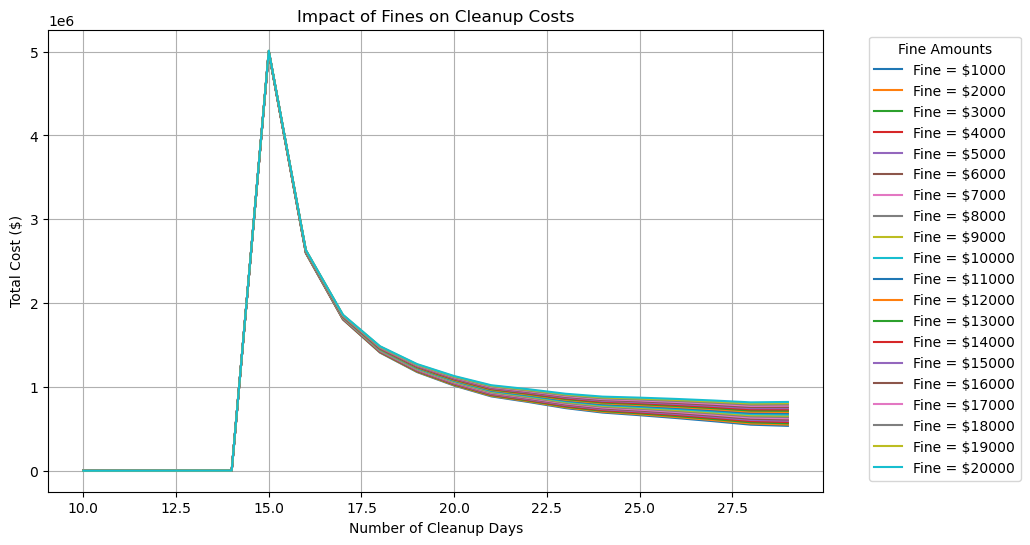

In [4]:
#I. D
import numpy as np
import matplotlib.pyplot as plt

# Parameters
days_limit = 14
local_cost_per_day = 500
additional_crew_cost_per_day = 800
additional_crew_setup_cost = 18000
cleanup_rate_local = 5 / 7
total_miles = 200

# Fine values from very low to higher than current to test sensitivity
fine_values = np.linspace(1000, 20000, 20)  # Fine values from $1000 to $20000
cleanup_days = np.arange(10, 30)  # Days range for cleanup

def calculate_total_cost(days, fine):
    if days > days_limit:
        fine_cost = (days - days_limit) * fine
    else:
        fine_cost = 0
    local_crew_cost = days * local_cost_per_day
    remaining_miles = max(total_miles - cleanup_rate_local * days, 0)
    additional_crews = np.ceil(remaining_miles / (cleanup_rate_local * (days - days_limit))) if days > days_limit else 0
    additional_crew_cost = additional_crews * (additional_crew_setup_cost + additional_crew_cost_per_day * (days - days_limit))
    total_cost = local_crew_cost + additional_crew_cost + fine_cost
    return total_cost

# Array to hold results
results = np.zeros((len(fine_values), len(cleanup_days)))

# Compute total costs for each fine and cleanup day combination
for idx, fine in enumerate(fine_values):
    for jdx, day in enumerate(cleanup_days):
        results[idx, jdx] = calculate_total_cost(day, fine)

# Plot results
plt.figure(figsize=(10, 6))
for idx, fine in enumerate(fine_values):
    plt.plot(cleanup_days, results[idx], label=f'Fine = ${fine:.0f}')
plt.xlabel('Number of Cleanup Days')
plt.ylabel('Total Cost ($)')
plt.title('Impact of Fines on Cleanup Costs')
plt.legend(title="Fine Amounts", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [3]:
#II. A
import numpy as np
from scipy.optimize import minimize

# Initial values
p = 1.50  # initial subscription price in dollars
s = 80000  # initial number of subscribers
q = 250  # initial price of advertising per page in dollars
d = 350  # initial number of pages of advertising per week

# Objective function to maximize profit
def profit_function(x):
    C, A = x  # C is the number of $0.10 raises in subscription price, A is the number of $100 raises in advertising price
    subscription_price = p + 0.10 * C
    num_subscribers = s - 5000 * C - 1000 * (50 * A) / 50
    ad_price = q + 100 * A
    num_pages_of_ads = d - 50 * A
    # Total profit
    profit = (subscription_price * num_subscribers) + (ad_price * num_pages_of_ads)
    return -profit  # We minimize negative profit to maximize profit

# Initial guess for C and A
initial_guess = [0, 0]

# Using minimize function from scipy.optimize
result = minimize(profit_function, initial_guess, method='BFGS')

# Optimal C and A values
C_opt, A_opt = result.x

# Calculate the optimal subscription and advertising prices
optimal_subscription_price = p + 0.10 * C_opt
optimal_advertising_price = q + 100 * A_opt

# Optimal profit
optimal_profit = -result.fun

# Print the results
print(f"Optimal Subscription Price: ${optimal_subscription_price:.2f} per week")
print(f"Optimal Advertising Price: ${optimal_advertising_price:.2f} per page")
print(f"Maximum Profit: ${optimal_profit:.2f} per week")


Optimal Subscription Price: $1.53 per week
Optimal Advertising Price: $459.71 per page
Maximum Profit: $229592.09 per week


In [4]:
#II. B
import numpy as np
from scipy.optimize import minimize

# Initial values
p = 1.50  # initial subscription price in dollars
s = 80000  # initial number of subscribers
q = 250  # initial price of advertising per page in dollars
d = 350  # initial number of pages of advertising per week
loss_values = [4000, 5000, 6000, 7000]  # Different assumptions for lost subscribers per $0.10 increase

# Function to compute profit based on variable loss rate
def profit_function(x, loss_rate):
    C, A = x  # C is the number of $0.10 raises in subscription price, A is the number of $100 raises in advertising price
    subscription_price = p + 0.10 * C
    num_subscribers = s - loss_rate * C - 1000 * (50 * A) / 50
    ad_price = q + 100 * A
    num_pages_of_ads = d - 50 * A
    # Total profit
    profit = (subscription_price * num_subscribers) + (ad_price * num_pages_of_ads)
    return -profit  # We minimize negative profit to maximize profit

# Loop through different lost subscribers per $0.10 increase and compute results
for loss_rate in loss_values:
    # Define a new objective function based on the current loss rate
    result = minimize(lambda x: profit_function(x, loss_rate), [0, 0], method='BFGS')
    
    # Optimal C and A values
    C_opt, A_opt = result.x
    
    # Calculate the optimal subscription and advertising prices
    optimal_subscription_price = p + 0.10 * C_opt
    optimal_advertising_price = q + 100 * A_opt
    
    # Optimal profit
    optimal_profit = -result.fun
    
    # Print the results for the current loss rate
    print(f"Loss of {loss_rate} subscribers per $0.10 increase:")
    print(f"  Optimal Subscription Price: ${optimal_subscription_price:.2f} per week")
    print(f"  Optimal Advertising Price: ${optimal_advertising_price:.2f} per page")
    print(f"  Maximum Profit: ${optimal_profit:.2f} per week")
    print("--------------------------------------------------")


Loss of 4000 subscribers per $0.10 increase:
  Optimal Subscription Price: $1.72 per week
  Optimal Advertising Price: $457.76 per page
  Maximum Profit: $231555.07 per week
--------------------------------------------------
Loss of 5000 subscribers per $0.10 increase:
  Optimal Subscription Price: $1.53 per week
  Optimal Advertising Price: $459.71 per page
  Maximum Profit: $229592.09 per week
--------------------------------------------------
Loss of 6000 subscribers per $0.10 increase:
  Optimal Subscription Price: $1.40 per week
  Optimal Advertising Price: $461.01 per page
  Maximum Profit: $230160.55 per week
--------------------------------------------------
Loss of 7000 subscribers per $0.10 increase:
  Optimal Subscription Price: $1.31 per week
  Optimal Advertising Price: $461.94 per page
  Maximum Profit: $232174.77 per week
--------------------------------------------------


In [5]:
#II. C
import numpy as np
from scipy.optimize import minimize

# Initial values
p = 1.50  # initial subscription price in dollars
s = 80000  # initial number of subscribers
q = 250  # initial price of advertising per page in dollars
d = 350  # initial number of pages of advertising per week
loss_pages_values = [40, 50, 60, 70]  # Different assumptions for lost ad pages per $100 increase

# Function to compute profit based on variable lost ad pages
def profit_function(x, lost_pages):
    C, A = x  # C is the number of $0.10 raises in subscription price, A is the number of $100 raises in advertising price
    subscription_price = p + 0.10 * C
    num_subscribers = s - 5000 * C - 1000 * (lost_pages * A) / 50
    ad_price = q + 100 * A
    num_pages_of_ads = d - lost_pages * A
    # Total profit
    profit = (subscription_price * num_subscribers) + (ad_price * num_pages_of_ads)
    return -profit  # We minimize negative profit to maximize profit

# Loop through different lost ad pages per $100 increase and compute results
for lost_pages in loss_pages_values:
    # Define a new objective function based on the current lost pages assumption
    result = minimize(lambda x: profit_function(x, lost_pages), [0, 0], method='BFGS')
    
    # Optimal C and A values
    C_opt, A_opt = result.x
    
    # Calculate the optimal subscription and advertising prices
    optimal_subscription_price = p + 0.10 * C_opt
    optimal_advertising_price = q + 100 * A_opt
    
    # Optimal profit
    optimal_profit = -result.fun
    
    # Print the results for the current lost pages assumption
    print(f"Loss of {lost_pages} ad pages per $100 increase:")
    print(f"  Optimal Subscription Price: ${optimal_subscription_price:.2f} per week")
    print(f"  Optimal Advertising Price: ${optimal_advertising_price:.2f} per page")
    print(f"  Maximum Profit: ${optimal_profit:.2f} per week")
    print("--------------------------------------------------")


Loss of 40 ad pages per $100 increase:
  Optimal Subscription Price: $1.53 per week
  Optimal Advertising Price: $547.24 per page
  Maximum Profit: $242936.85 per week
--------------------------------------------------
Loss of 50 ad pages per $100 increase:
  Optimal Subscription Price: $1.53 per week
  Optimal Advertising Price: $459.71 per page
  Maximum Profit: $229592.09 per week
--------------------------------------------------
Loss of 60 ad pages per $100 increase:
  Optimal Subscription Price: $1.53 per week
  Optimal Advertising Price: $401.35 per page
  Maximum Profit: $221352.29 per week
--------------------------------------------------
Loss of 70 ad pages per $100 increase:
  Optimal Subscription Price: $1.53 per week
  Optimal Advertising Price: $359.65 per page
  Maximum Profit: $216029.94 per week
--------------------------------------------------
